Pour essayer les exemples présents dans ce tutoriel : 


<a href="https://github.com/linogaliana/python-datascientist/blob/master/course/manipulation/01_numpy.ipynb" class="github"><i class="fab fa-github"></i></a>
[![Download](https://img.shields.io/badge/Download-Notebook-important?logo=Jupyter)](https://downgit.github.io/#/home?url=https://github.com/linogaliana/python-datascientist/blob/master/course/manipulation/01_numpy.ipynb)
[![nbviewer](https://img.shields.io/badge/Visualize-nbviewer-blue?logo=Jupyter)](https://nbviewer.jupyter.org/github/linogaliana/python-datascientist/blob/master/course/manipulation/01_numpy.ipynb)
[![Onyxia](https://img.shields.io/badge/SSPcloud-Tester%20via%20SSP--cloud-informational&color=yellow?logo=Python)](https://datalab.sspcloud.fr/launcher/inseefrlab-helm-charts-datascience/jupyter?autoLaunch=true&onyxia.friendlyName=%C2%ABpython-datascience%C2%BB&init.personalInit=%C2%ABhttps%3A%2F%2Fraw.githubusercontent.com%2Flinogaliana%2Fpython-datascientist%2Fmaster%2Fsspcloud%2Finit-jupyter.sh%C2%BB&init.personalI
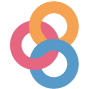

In [1]:
#| echo: false
#| output: 'asis'
#| include: true
#| eval: true

import sys
sys.path.insert(1, '../../../../') #insert the utils module
from utils import print_badges

#print_badges(__file__)
print_badges("content/course/manipulation/01_numpy.qmd")

Il est recommandé de régulièrement se référer à
la [cheatsheet numpy](https://www.datacamp.com/community/blog/python-numpy-cheat-sheet) et à la
[doc officielle](https://numpy.org/doc/stable/) en cas de doute
sur une fonction. 

Dans ce chapitre, on ne dérogera pas à la convention qui s'est imposée
d'importer `numpy` de la
manière suivante:


In [2]:
import numpy as np

Si les scripts suivants sont exécutés dans un `notebook`, il est recommandé d'utiliser les paramètres suivants
pour contrôler le rendu

~~~python
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
~~~


## Le concept d'array

Le concept central de `NumPy` (`Numerical Python`) est
l'**`array`** qui est un tableau de données multidimensionnel.

L'array numpy peut être unidimensionnel et s'apparenter à un vecteur (1d-array),
bidimensionnel et ainsi s'apparenter à une matrice (2d-array) ou, de manière plus générale, 
prendre la forme d'un objet
multidimensionnel (Nd-array). 

Les tableaux simples (uni ou bi-dimensionnels) sont faciles à se représenter et seront particulièrement
utilisés dans le paradigme des DataFrames mais 
la possibilité d'avoir des objets multidimensionnels permettra d'exploiter des
structures très complexes.

Un DataFrame sera construit à partir d'une collection
d'array uni-dimensionnels (les variables de la table), ce qui permettra d'effectuer des opérations cohérentes
(et optimisées) avec le type de la variable.


Par rapport à une liste,

* un *array* ne peut contenir qu'un type de données (`integer`, `string`, etc.),
 contrairement à une liste.
* les opérations implémentées par `numpy` seront plus efficaces et demanderont moins
de mémoire



Les données géographiques constitueront une construction un peu plus complexe qu'un `DataFrame` traditionnel. 
La dimension géographique prend la forme d'un tableau plus profond, au moins bidimensionnel
(coordonnées d'un point). 


## Créer un array

On peut créer un `array` de plusieurs manières. Pour créer un `array` à partir d'une liste,
il suffit d'utiliser la méthode `array`:


In [3]:
np.array([1,2,5])

array([1, 2, 5])

Il est possible d'ajouter un argument `dtype` pour contraindre le type du *array*:


In [4]:
np.array([["a","z","e"],["r","t"],["y"]], dtype="object")

array([list(['a', 'z', 'e']), list(['r', 't']), list(['y'])], dtype=object)

Il existe aussi des méthodes pratiques pour créer des array:

* séquences logiques : `np.arange` (suite) ou `np.linspace` (interpolation linéaire entre deux bornes)
* séquences ordonnées: _array_ rempli de zéros, de 1 ou d'un nombre désiré : `np.zeros`, `np.ones` ou `np.full`
* séquences aléatoires: fonctions de génération de nombres aléatoires: `np.rand.uniform`, `np.rand.normal`, etc. 
* tableau sous forme de matrice identité: `np.eye`


In [5]:
np.arange(0,10)
np.arange(0,10,3)
np.linspace(0, 1, 5)
np.zeros(10, dtype=int)
np.ones((3, 5), dtype=float)
np.full((3, 5), 3.14)
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

{{% box status="exercise" title="Exercise 1" icon="fas fa-pencil-alt" %}}

Générer:

* $X$ une variable aléatoire, 1000 répétitions d'une loi $U(0,1)$
* $Y$ une variable aléatoire, 1000 répétitions d'une loi normale de moyenne nulle et de variance égale à 2
* Vérifier la variance de $Y$ avec `np.var`

{{% /box %}}


In [6]:
#| include: false

# Correction
X = np.random.uniform(0,1,1000)
Y = np.random.normal(0,np.sqrt(2),1000)

np.var(Y)

2.1632293391915107

## Indexation et slicing

### Logique dans le cas d'un array unidimensionnel

La structure la plus simple imaginable est l'array unidimensionnel:


In [7]:
x = np.arange(10)
print(x)

[0 1 2 3 4 5 6 7 8 9]


L'indexation est dans ce cas similaire à celle d'une liste: 

* le premier élément est 0
* le énième élément est accessible à la position $n-1$

La logique d'accès aux éléments est ainsi la suivante:

~~~python
x[start:stop:step]
~~~

Avec un *array* unidimensionnel, l'opération de *slicing* (garder une coupe du *array*) est très simple. 
Par exemple, pour garder les *K* premiers éléments d'un *array*, on fera:

~~~python
x[:(K-1)]
~~~

En l'occurrence, on sélectionne le K$^{eme}$ élément en utilisant

~~~python
x[K-1]
~~~

Pour sélectionner uniquement un élément, on fera ainsi:


In [8]:
x = np.arange(10)
x[2]

2

Les syntaxes qui permettent de sélectionner des indices particuliers d'une liste fonctionnent également
avec les arrays.

{{% box status="exercise" title="Exercise 2" icon="fas fa-pencil-alt" %}}

* Sélectionner les éléments 0,3,5
* Sélectionner les éléments pairs
* Sélectionner tous les éléments sauf le premier
* Sélectionner les 5 premiers éléments

{{% /box %}}


In [9]:
#| include: false

# Correction
x[[0,3,5]]
x[::2]
x[-0]
x[:5]
# x2[0,:] # La première ligne

array([0, 1, 2, 3, 4])

### Sur la performance

Un élément déterminant dans la performance de `numpy` par rapport aux listes, lorsqu'il est question de 
*slicing* est qu'un array ne renvoie pas une
copie de l'élément en question (copie qui coûte de la mémoire et du temps) mais simplement une vue de celui-ci.

Lorsqu'il est nécessaire d'effectuer une copie, par exemple pour ne pas altérer l'array sous-jacent, on peut 
utiliser la méthode `copy`:

~~~python
x_sub_copy = x[:2, :2].copy()
~~~

-----


### Filtres logiques


Il est également possible, et plus pratique, de sélectionner des données à partir de conditions logiques
(opération qu'on appelle un *boolean mask*)
Cette fonctionalité servira principalement à 
effectuer des opérations de filtre sur les données.

Pour des opérations de comparaison simples, les comparateurs logiques peuvent être suffisants. 
Ces comparaisons fonctionnent aussi sur les tableaux multidimensionnels grâce au
*broadcasting* sur lequel nous reviendrons :

```python
x = np.arange(10)
x2 = np.array([[-1,1,-2],[-3,2,0]])
print(x)
print(x2)
```

```python
x==2
x2<0
```

Pour sélectionner les observations relatives à la condition logique,
il suffit d'utiliser la logique de *slicing* de `numpy` qui fonctionne avec les conditions logiques

{{% box status="exercise" title="Exercise 3" icon="fas fa-pencil-alt" %}}

Soit 


In [10]:
x = np.random.normal(size=10000)

1. Ne conserver que les valeurs dont la valeur absolue est supérieure à 1.96
2. Compter le nombre de valeurs supérieures à 1.96 en valeur absolue et leur proportion dans l'ensemble
3. Sommer les valeurs absolues de toutes les observations supérieures (en valeur absolue) à 1.96
et rapportez les à la somme des valeurs de `x` (en valeur absolue) 

{{% /box %}}


In [11]:
#| include: false

# Correction
x = np.random.normal(size=10000)

x2 = x[np.abs(x)>=1.96]

print(x2.size)
print(x2.size/x.size)
np.sum(np.abs(x2))/np.sum(np.abs(x))

488
0.0488


0.1458795007933684

Lorsque c'est possible, il est recommandé d'utiliser les fonctions logiques de `numpy` (optimisées et 
qui gèrent bien la dimension). Parmi elles, on peut retrouver:

* `count_nonzero`
* `isnan`
* `any` ; `all` ; notamment avec l'argument `axis`
* `np.array_equal` pour vérifier, élément par élément, l'égalité

{{% box status="exercise" title="Exercise 4" icon="fas fa-pencil-alt" %}}

Soit


In [12]:
x = np.random.normal(0, size=(3, 4))

un *array* multidimensionnel et


In [13]:
y = np.array([np.nan, 0, 1])

un *array* unidimensionnel présentant une valeur manquante. 

1. Utiliser `count_nonzero` sur `y`
2. Utiliser `isnan` sur `y` et compter le nombre de valeurs non NaN
3. Vérifier que `x` comporte au moins une valeur positive dans son ensemble, en parcourant les lignes puis les colonnes. 

Note : Jetez un oeil à ce que correspond le paramètre `axis` dans `numpy` en vous documentant sur internet. Par exemple [ici](https://www.sharpsightlabs.com/blog/numpy-axes-explained/).

{{% /box %}}


In [14]:
#| include: false

# Correction
x = np.random.normal(0, size=(3, 4))
y = np.array([np.nan, 0, 1])

print(x)
print(y)
# 1. Utiliser `count_nonzero` sur `y`
print(np.count_nonzero(y))
# 2. Utiliser `isnan` sur `y` et compter le nombre de valeurs non NaN
print(np.isnan(y))
print(np.sum(np.isnan(y)))
# 3. Vérifier que `x` comporte au moins une valeur positive dans son ensemble, en parcourant les lignes puis les colonnes
print(np.any(x>0))
print(np.any(x>0, axis = 0))
print(np.any(x>0, axis = 1))

[[ 0.4499696   0.4537445   0.34830515  1.03754276]
 [ 0.04691064 -0.67484324 -0.77142206 -0.37233147]
 [ 1.73123242  0.01945074  1.67829326  0.97770953]]
[nan  0.  1.]
2
[ True False False]
1
True
[ True  True  True  True]
[ True  True  True]


## Manipuler un array

Dans cette section, on utilisera un array multidimensionnel:


In [15]:
x = np.random.normal(0, size=(3, 4))

### Statistiques sur un array

Pour les statistiques descriptives classiques, `numpy` propose un certain nombre de fonctions déjà implémentées,
qui peuvent être combinées avec l'argument `axis`

{{% box status="exercise" title="Exercise 5" icon="fas fa-pencil-alt" %}}

1. Faire la somme de tous les éléments d'un `array`, des éléments en ligne et des éléments en colonne. Vérifier
la cohérence
2. Ecrire une fonction `statdesc` pour renvoyer les valeurs suivantes : moyenne, médiane, écart-type, minimum et maximum.
L'appliquer sur `x` en jouant avec l'argument axis

{{% /box %}}


In [16]:
#| include: false

# Correction
x.sum()
x.sum(axis = 0)
x.sum(axis = 1)
# check coherence
x.sum(axis = 0).sum()
x.sum(axis = 1).sum()

0.24191866730308642

In [17]:
#| include: false

# Correction

def statdesc(x, axis = None):
    """
    Statistiques agrégées sur un array numpy

    :param x: Numpy array
    :param axis: Numpy dimension that should be used
    :return: A numpy array with mean, median, sd, min and max
    """

    return np.array([
        np.mean(x, axis = axis),
        np.median(x, axis = axis),
        np.std(x, axis = axis),
        np.min(x, axis = axis),
        np.max(x, axis = axis)
        ])

statdesc(x)
statdesc(x, axis = 0)
statdesc(x, axis = 1)

array([[ 0.3567723 , -0.00361602, -0.29267662],
       [ 0.5725185 ,  0.26980762, -0.24709655],
       [ 1.18668661,  0.60444478,  0.3176847 ],
       [-1.33127431, -1.03921554, -0.77529857],
       [ 1.61332652,  0.48513623,  0.0987852 ]])

### Fonctions de manipulation

Voici quelques fonctions pour modifier un array, 

| Opération | Implémentation |
|-----------|----------------|
| Applatir un array | `x.flatten()` (méthode) |
| Transposer un array | `x.T` (méthode) ou `np.transpose(x)` (fonction) |
| Ajouter des éléments à la fin | `np.append(x, [1,2])` |
| Ajouter des éléments à un endroit donné (aux positions 1 et 2) | `np.insert(x, [1,2], 3)` |
| Supprimer des éléments (aux positions 0 et 3) | `np.delete(x, [0,3])` |

Pour combiner des array, on peut utiliser, selon les cas, 
les fonctions `np.concatenate`, `np.vstack` ou la méthode `.r_` (concaténation *rowwise*). 
`np.hstack` ou la méthode `.column_stack` ou `.c_` (concaténation *column-wise*)


In [18]:
x = np.random.normal(size = 10)

Pour ordonner un array, on utilise `np.sort`


In [19]:
x = np.array([7, 2, 3, 1, 6, 5, 4])

np.sort(x)

array([1, 2, 3, 4, 5, 6, 7])

Si on désire faire un ré-ordonnement partiel pour trouver les _k_ valeurs les plus petites d'un `array` sans les ordonner, on utilise `partition`:


In [20]:
np.partition(x, 3)

array([2, 1, 3, 4, 6, 5, 7])

## Broadcasting

Le *broadcasting* désigne un ensemble de règles permettant
d'appliquer des opérations sur des tableaux de dimensions différentes. En pratique, 
cela consiste généralement à appliquer une seule opération à l'ensemble des membres d'un tableau `numpy`. 

La différence peut être comprise à partir de l'exemple suivant. Le *broadcasting* permet
de transformer le scalaire `5` en *array* de dimension 3:


In [21]:
a = np.array([0, 1, 2])

b = np.array([5, 5, 5])

a + b
a + 5

array([5, 6, 7])

Le *broadcasting* peut être très pratique pour effectuer de manière efficace des opérations sur des données à
la structure complexe. Pour plus de détails, se rendre
[ici](https://jakevdp.github.io/PythonDataScienceHandbook/02.05-computation-on-arrays-broadcasting.html) ou [ici](https://stackoverflow.com/questions/47435526/what-is-the-meaning-of-axis-1-in-keras-argmax).

## Une application: programmer ses propres k-nearest neighbors

<!----
L'idée de cet exercice vient de
[là](https://jakevdp.github.io/PythonDataScienceHandbook/02.08-sorting.html#Example:-k-Nearest-Neighbors). 
------>

{{% box status="exercise" title="Exercise (un peu corsé)" icon="fas fa-pencil-alt" %}}

1. Créer `X` un tableau à deux dimensions (i.e. une matrice) comportant 10 lignes
et 2 colonnes. Les nombres dans le tableau sont aléatoires.
2. Importer le module `matplotlib.pyplot` sous le nom `plt`. Utiliser
`plt.scatter` pour représenter les données sous forme de nuage de points. 
3. Constuire une matrice 10x10 stockant, à l'élément $(i,j)$, la distance euclidienne entre les points $X[i,]$ et $X[j,]$. Pour cela, il va falloir jouer avec les dimensions en créant des tableaux emboîtés à partir par des appels à `np.newaxis` :
  + En premier lieu, utiliser `X1 = X[:, np.newaxis, :]` pour transformer la matrice en tableau emboîté. Vérifier les dimensions
  + Créer `X2` de dimension `(1, 10, 2)` à partir de la même logique
  + En déduire, pour chaque point, la distance avec les autres points pour chaque coordonnées. Elever celle-ci au carré
  + A ce stade, vous devriez avoir un tableau de dimension `(10, 10, 2)`. La réduction à une matrice s'obtient en sommant sur le dernier axe. Regarder dans l'aide de `np.sum` comme effectuer une somme sur le dernier axe. 
  + Enfin, appliquer la racine carrée pour obtenir une distance euclidienne en bonne et due forme. 
4. Vérifier que les termes diagonaux sont bien nuls (distance d'un point à lui-même...)
5. Il s'agit maintenant de classer, pour chaque point, les points dont les valeurs sont les plus similaires. Utiliser `np.argsort` pour obtenir, pour chaque ligne, le classement des points les plus proches
6. On va s'intéresser aux k-plus proches voisins. Pour le moment, fixons k=2. Utiliser `argpartition` pour réordonner chaque ligne de manière à avoir les 2 plus proches voisins de chaque point d'abord et le reste de la ligne ensuite
7. Utiliser le morceau de code ci-dessous

~~~python
plt.scatter(X[:, 0], X[:, 1], s=100)

# draw lines from each point to its two nearest neighbors
K = 2

for i in range(X.shape[0]):
    for j in nearest_partition[i, :K+1]:
        # plot a line from X[i] to X[j]
        # use some zip magic to make it happen:
        plt.plot(*zip(X[j], X[i]), color='black')
~~~

pour représenter graphiquement le réseau de plus proches voisins

{{% /box %}}


[0.91074575 0.43012376 0.09684788 0.55055254 0.2908458  0.19297842
 0.05017591 0.74600129 0.8117502  0.87113209]
[0.49258393 0.78847724 0.54338606 0.28543468 0.57287445 0.99449753
 0.92525927 0.06835244 0.6737083  0.89677148]


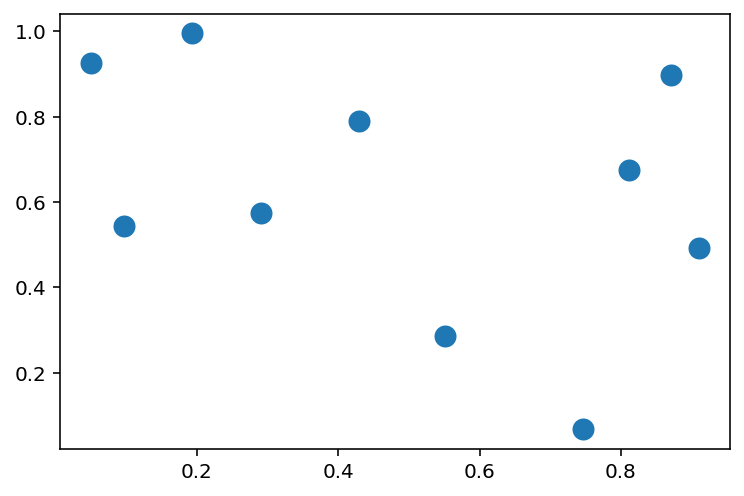

In [22]:
#| include: false
#| echo: false

# Correction

# 1. Definition de X
X = np.random.rand(10, 2)

# 2. Nuage de points. 
import matplotlib.pyplot as plt
print(X[:,0])
print(X[:,1])
plt.scatter(X[:, 0], X[:, 1], s=100)

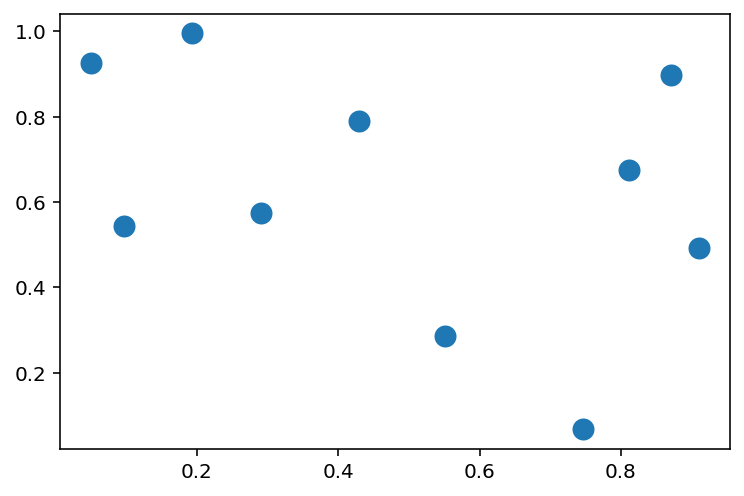

In [23]:
#| include: false
#| echo: false

fig = plt.figure()
plt.scatter(X[:, 0], X[:, 1], s=100)
fig
plt.savefig("scatter_numpy.png", bbox_inches='tight')

Pour la question 2, vous devriez obtenir un graphique ayant cet aspect :

![](scatter_numpy.png)


(10, 2)
dimension X1 :  (10, 1, 2)
dimension X2 :  (1, 10, 2)
dimension dist1 :  (10, 10, 2)
dimension dist :  (10, 10)
[[0.         0.56440264 0.81548181 0.41551168 0.625078   0.87584656
  0.96321773 0.4550968  0.20641259 0.40612414]
 [0.56440264 0.         0.41369372 0.5172571  0.25667667 0.31413735
  0.40381889 0.78635765 0.39851054 0.4541101 ]
 [0.81548181 0.41369372 0.         0.52190692 0.19622629 0.46124033
  0.38471473 0.80439859 0.72668371 0.85111532]
 [0.41551168 0.5172571  0.52190692 0.         0.38738768 0.79412177
  0.81225137 0.29210429 0.46795366 0.69029264]
 [0.625078   0.25667667 0.19622629 0.38738768 0.         0.43283258
  0.42672832 0.67949171 0.53057408 0.6645611 ]
 [0.87584656 0.31413735 0.46124033 0.79412177 0.43283258 0.
  0.15870253 1.07869321 0.69698224 0.68515895]
 [0.96321773 0.40381889 0.38471473 0.81225137 0.42672832 0.15870253
  0.         1.10383979 0.8020432  0.8214503 ]
 [0.4550968  0.78635765 0.80439859 0.29210429 0.67949171 1.07869321
  1.10383979 0.

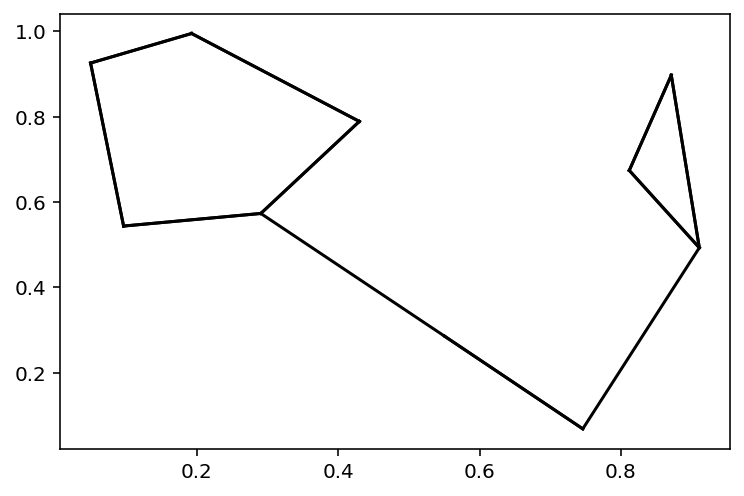

In [24]:
#| include: false
#| echo: false

# 3. Construire la matrice des distances euclidiennes
print(X.shape)
X1 = X[:, np.newaxis, :]
print("dimension X1 : ", X1.shape)
X2 = X[np.newaxis, :,:]
print("dimension X2 : ", X2.shape)
dist1 = (X1 - X2) ** 2
print("dimension dist1 : ", dist1.shape)
dist = np.sqrt(np.sum((X1 - X2) ** 2, axis=-1))
print("dimension dist : ", dist.shape)

# 4. Vérif termes diagonaux 
print(dist)
print(dist.diagonal())

#5. Classer avec np.argsort 
np.argsort(dist)

#6. 2ppv
K = 2
nearest_partition = np.argpartition(dist, K + 1, axis=1)
print(nearest_partition) # Ne pas oublier que le plus proche voisin d'un point est lui-même !

#7. Tester le bout de code
# Each point in the plot has lines drawn to its two nearest neighbors.
fig = plt.figure()
for i in range(X.shape[0]):
    for j in nearest_partition[i, :K+1]:
        # plot a line from X[i] to X[j]
        # use some zip magic to make it happen:
        plt.plot(*zip(X[j], X[i]), color='black')
fig
plt.savefig("knn.png", bbox_inches='tight')

Le résultat de la question 7 est le suivant: 

![](knn.png)

Ai-je inventé cet exercice corsé ? Pas du tout, il [vient de là](https://jakevdp.github.io/PythonDataScienceHandbook/02.08-sorting.html#Example:-k-Nearest-Neighbors). Mais, si je vous l'avais indiqué immédiatement, auriez-vous cherché à répondre aux questions ?

Par ailleurs, il ne serait pas une bonne idée de généraliser cet algorithme à de grosses données. La complexité de notre approche est $O(N^2)$. L'algorithme implémenté par Scikit-learn est
en $O[NlogN]$.

De plus, le calcul de distances matricielles en utilisant la puissance des cartes graphiques serait plus rapide. A cet égard, la librairie [faiss](https://github.com/facebookresearch/faiss) offre des performances beaucoup plus satisfaisantes que celles que permettraient `numpy` sur ce problème précis.

<!-----
## Restructuration, concaténation et division

* Pour restructurer un `array`, c'est-à-dire changer ses dimensions, le plus simple est d'utiliser la méthode `reshape`. Par exemple, pour 

np.reshape
np.concatenate
np.split, np.hsplit, and np.vsplit
----->

## Exercices supplémentaires

* Simulations de variables aléatoires ;
* TCL ;
* Pagerank


In [25]:
"""PageRank algorithm with explicit number of iterations.

Returns
-------
ranking of nodes (pages) in the adjacency matrix

"""

import numpy as np

def pagerank(M, num_iterations: int = 100, d: float = 0.85):
    """PageRank: The trillion dollar algorithm.

    Parameters
    ----------
    M : numpy array
        adjacency matrix where M_i,j represents the link from 'j' to 'i', such that for all 'j'
        sum(i, M_i,j) = 1
    num_iterations : int, optional
        number of iterations, by default 100
    d : float, optional
        damping factor, by default 0.85

    Returns
    -------
    numpy array
        a vector of ranks such that v_i is the i-th rank from [0, 1],
        v sums to 1

    """
    N = M.shape[1]
    v = np.random.rand(N, 1)
    v = v / np.linalg.norm(v, 1)
    M_hat = (d * M + (1 - d) / N)
    for i in range(num_iterations):
        v = M_hat @ v
    return v

M = np.array([[0, 0, 0, 0, 1],
              [0.5, 0, 0, 0, 0],
              [0.5, 0, 0, 0, 0],
              [0, 1, 0.5, 0, 0],
              [0, 0, 0.5, 1, 0]])
v = pagerank(M, 100, 0.85)